In [11]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [12]:
df = pd.read_csv('stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]
print(df.head(15))
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

                                                 post           tags
0   what is causing this behavior  in our c# datet...             c#
1   have dynamic html load as if it was in an ifra...        asp.net
2   how to convert a float value in to min:sec  i ...    objective-c
3   .net framework 4 redistributable  just wonderi...           .net
4   trying to calculate and print the mean and its...         python
5   how to give alias name for my website  i have ...        asp.net
6   window.open() returns null in angularjs  it wo...      angularjs
7   identifying server timeout quickly in iphone  ...         iphone
8   unknown method key  error in rails 2.3.8 unit ...  ruby-on-rails
9   from the include  how to show and hide the con...      angularjs
10  when we need interface c# <blockquote>    <str...             c#
11  how to install .ipa on jailbroken iphone over ...            ios
12  dynamic textbox text - asp.net  i m trying to ...        asp.net
13  rather than bubblesorting thes

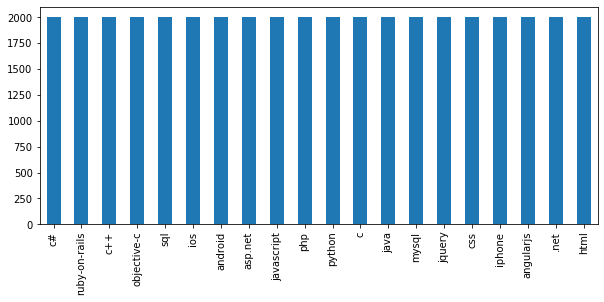

In [13]:
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [14]:
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

In [54]:
df['post'][54]

'unhash type subclass int let us defin simpl test class inherit int test dict b class test int def str self return test dict self def repr self return str self name main print test print represent test class expect let us redefin eq method test dict b class test int def str self return test dict self def repr self return str self def eq self isinst int return self isinst str return str self return fals name main print test howev result follow traceback traceback recent call last file test py line modul print test file test py line str return test dict self typeerror unhash type test could somebodi explain happen could avoid error still abl redefin eq method'

In [16]:
#REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
BAD_SYMBOLS_RE = re.compile('[^a-z]')
STOPWORDS = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    #text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in STOPWORDS]
    text = ' '.join(words)   
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)
print_plot(10)

need interfac c possibl duplic would want use interfac need interfac want know use exampl interfac idemo function prototyp public void show first class use interfac class myclass idemo public void show function bodi come respons write myclass second class use interfac class myclass idemo public void show function bodi come respons write myclass respons write two class function name differ bodi even achiev without interfac need interfac use
Tag: c#


In [17]:
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

3664020


In [18]:
df.to_csv('cleaned_data.csv')

In [19]:
df = pd.read_csv('cleaned_data.csv')
df.dtypes

Unnamed: 0     int64
post          object
tags          object
dtype: object

In [20]:
X = df['post'].astype('|S')
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state = 42)

In [55]:
#test sample for testing new post , cleaning up data
topic=['asp.net is best for web development']
cleaner= lambda x: clean_text(x)
clean_txt= list(map(cleaner, new_qus))

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7291666666666666
               precision    recall  f1-score   support

         java       0.63      0.62      0.63       613
         html       0.92      0.88      0.90       620
      asp.net       0.87      0.94      0.90       587
           c#       0.73      0.81      0.77       586
ruby-on-rails       0.75      0.86      0.80       599
       jquery       0.71      0.50      0.59       589
        mysql       0.76      0.78      0.77       594
          php       0.66      0.89      0.76       610
          ios       0.59      0.55      0.57       617
   javascript       0.58      0.67      0.62       587
       python       0.74      0.51      0.60       611
            c       0.82      0.74      0.78       594
          css       0.81      0.57      0.67       619
      android       0.65      0.79      0.71       574
       iphone       0.60      0.81      0.69       584
          sql       0.67      0.59      0.63       578
  objective-c       0.70      0.77  

In [56]:
nb.predict(clean_txt)

array(['asp.net'], dtype='<U13')

# SVM

In [22]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7784166666666666
               precision    recall  f1-score   support

         java       0.75      0.64      0.69       613
         html       0.86      0.93      0.90       620
      asp.net       0.88      0.97      0.92       587
           c#       0.79      0.83      0.81       586
ruby-on-rails       0.73      0.89      0.80       599
       jquery       0.73      0.39      0.50       589
        mysql       0.84      0.72      0.77       594
          php       0.66      0.95      0.78       610
          ios       0.80      0.48      0.60       617
   javascript       0.70      0.59      0.64       587
       python       0.70      0.65      0.68       611
            c       0.80      0.88      0.84       594
          css       0.78      0.77      0.78       619
      android       0.83      0.83      0.83       574
       iphone       0.80      0.80      0.80       584
          sql       0.65      0.57      0.61       578
  objective-c       0.79      0.87  

In [57]:
sgd.predict(clean_txt)

array(['asp.net'], dtype='<U13')

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

C:\Users\sanju-pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.7560833333333333
               precision    recall  f1-score   support

         java       0.59      0.61      0.60       613
         html       0.92      0.91      0.92       620
      asp.net       0.96      0.96      0.96       587
           c#       0.74      0.74      0.74       586
ruby-on-rails       0.79      0.82      0.80       599
       jquery       0.53      0.52      0.52       589
        mysql       0.76      0.74      0.75       594
          php       0.79      0.83      0.81       610
          ios       0.66      0.65      0.66       617
   javascript       0.60      0.55      0.57       587
       python       0.62      0.63      0.63       611
            c       0.83      0.80      0.82       594
          css       0.76      0.75      0.75       619
      android       0.85      0.82      0.84       574
       iphone       0.75      0.78      0.77       584
          sql       0.57      0.58      0.58       578
  objective-c       0.78      0.81  

In [59]:
logreg.predict(clean_txt)

array(['asp.net'], dtype=object)

# Keras


In [2]:
import pandas as pd
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers

Using TensorFlow backend.


In [3]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 10  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence
GLOVE_DIM = 100  # Number of dimensions of the GloVe word embeddings

In [4]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history


def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [5]:
df1 = pd.read_csv('cleaned_data.csv')
xin = df1['post'].astype(str)
yin = df1.tags
X_train, X_test, y_train, y_test = train_test_split(xin,
                                                    yin, test_size=0.1,
                                                    random_state=37)

tk = Tokenizer(num_words=NB_WORDS)
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [6]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [7]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [8]:
X_train_emb, X_valid_emb,y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc,
                                            y_train_oh, test_size=0.1, random_state=37)

## model 1

In [21]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(20, activation='softmax'))
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [22]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

4000/4000 [==============================] - 0s 52us/step
/n
Test accuracy of word embeddings model: 58.60%


## model 2

In [26]:
emb_model2 = models.Sequential()
emb_model2.add(layers.Embedding(15000,200, input_length=MAX_LEN))
emb_model2.add(layers.Flatten())
emb_model2.add(layers.Dense(20, activation='softmax'))
emb_history2 = deep_model(emb_model2, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)

In [45]:
emb_results2 = test_model(emb_model2, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 3)
print('/n')
print('Test accuracy of word embedding model 2: {0:.2f}%'.format(emb_results2[1]*100))

4000/4000 [==============================] - 0s 97us/step
/n
Test accuracy of word embedding model 2: 63.82%


In [77]:
new_qus=['asp.net is best for web development']
cleaner= lambda x: clean_text(x)
clean_txt= list(map(cleaner, new_qus))
seq = tk.texts_to_sequences(clean_txt)
padded = pad_sequences(seq, maxlen=MAX_LEN)
pred = emb_model2.predict(padded)
labels=list(le.classes_)
values=np.round_(pred,decimals=2)[0]
print(labels[np.argmax(pred)])

asp.net


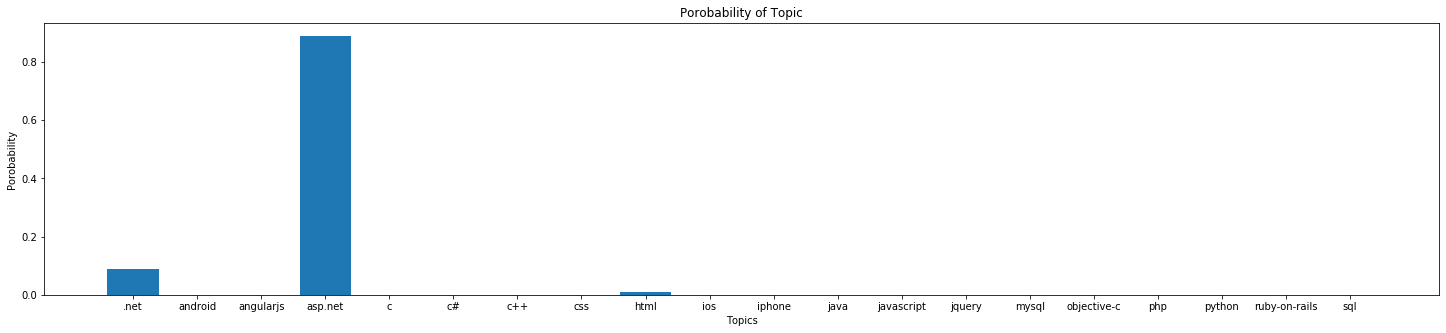

In [80]:
# set plot size for all plots that follow
plt.rcParams["figure.figsize"] = (25, 5)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
ax.bar(labels, values)

# set plot title
ax.set(title="Porobability of Topic")

# add labels to the axes
ax.set(xlabel="Topics", ylabel="Porobability");
